In [31]:
#1. Data Exploration & Preprocessing
#Step 1: Load and Explore Dataset

In [33]:
import pandas as pd

# Load dataset
df = pd.read_csv("Alphabets_data.csv")

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())

# Summary
print("\nNumber of samples:", len(df))
print("Number of features:", df.shape[1]-1)
print("Number of classes:", df['letter'].nunique())
print("Classes:", df['letter'].unique())


Shape: (20000, 17)

Columns: Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

Data Types:
 letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

Missing Values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

First 5 rows:
   letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    

In [35]:
#Step 2: Preprocessing

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Features and target
X = df.drop('letter', axis=1)
y = df['letter']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode target for ANN
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("✅ Data preprocessing done.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


✅ Data preprocessing done.
X_train shape: (16000, 16)
y_train shape: (16000, 26)


In [39]:
#2. Model Implementation (Basic ANN)
#Step 3: Build and Train Model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")


Epoch 1/20


C:\Users\Anjali\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4048 - loss: 2.2151 - val_accuracy: 0.7569 - val_loss: 0.8840
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7746 - loss: 0.7668 - val_accuracy: 0.8213 - val_loss: 0.6430
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8311 - loss: 0.5731 - val_accuracy: 0.8484 - val_loss: 0.5258
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.4679 - val_accuracy: 0.8737 - val_loss: 0.4322
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8909 - loss: 0.3772 - val_accuracy: 0.8859 - val_loss: 0.3772
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9057 - loss: 0.3300 - val_accuracy: 0.8963 - val_loss: 0.3478
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.2867 - val_accuracy: 0.9053 - val_loss: 0.3165
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9266 - loss: 0.2591 - val_accuracy: 0.9153 - val_

In [43]:
#3. Hyperparameter Tuning

#We will use Keras Tuner for Random Search.

#Step 4: Install and Import Keras Tuner

In [45]:
!pip install keras-tuner
import keras_tuner as kt


In [47]:
#Step 5: Define Hypermodel

In [49]:
def build_model(hp):
    model = Sequential()
    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32),
                    activation=hp.Choice('activation', ['relu','tanh']),
                    input_dim=X_train.shape[1]))
    
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                        activation=hp.Choice('activation', ['relu','tanh'])))
    
    # Output layer
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [51]:
#Step 6: Run Hyperparameter Search

In [53]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=10,
                        executions_per_trial=2,
                        directory='my_dir',
                        project_name='alphabet_ann')

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Units in first layer: {best_hps.get('units_input')}
- Activation: {best_hps.get('activation')}
- Number of layers: {best_hps.get('num_layers')}
- Learning rate: {best_hps.get('learning_rate')}
""")


Trial 10 Complete [00h 00m 24s]
val_accuracy: 0.7962499856948853

Best val_accuracy So Far: 0.9542187750339508
Total elapsed time: 00h 03m 56s

Best Hyperparameters:
- Units in first layer: 128
- Activation: tanh
- Number of layers: 3
- Learning rate: 0.001



In [54]:
#Step 7: Train Best Model

In [57]:
best_model = tuner.hypermodel.build(best_hps)
history_best = best_model.fit(X_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20


C:\Users\Anjali\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5596 - loss: 1.6419 - val_accuracy: 0.7866 - val_loss: 0.7952
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8184 - loss: 0.6689 - val_accuracy: 0.8450 - val_loss: 0.5585
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8774 - loss: 0.4638 - val_accuracy: 0.8963 - val_loss: 0.3974
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9105 - loss: 0.3374 - val_accuracy: 0.9181 - val_loss: 0.3086
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9343 - loss: 0.2485 - val_accuracy: 0.9275 - val_loss: 0.2601
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9460 - loss: 0.1957 - val_accuracy: 0.9369 - val_loss: 0.2215
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9590 - loss: 0.1518 - val_accuracy: 0.9428 - val_loss: 0.1939
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.1112 - val_accuracy: 0.9478 - val_

In [58]:
#4. Evaluation
#Step 8: Predict & Metrics

In [61]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("✅ Accuracy:", accuracy_score(y_true, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       149
           1       0.91      0.98      0.95       153
           2       0.96      0.94      0.95       137
           3       0.95      0.94      0.94       156
           4       0.92      0.91      0.91       141
           5       0.98      0.92      0.95       140
           6       0.96      0.97      0.96       160
           7       0.96      0.90      0.92       144
           8       0.95      0.99      0.97       146
           9       0.99      0.97      0.98       149
          10       0.89      0.96      0.93       130
          11       0.97      0.96      0.97       155
          12       0.95      0.99      0.97       168
          13       1.00      0.97      0.98       151
          14       0.96      0.98      0.97       145
          15       0.97      0.98      0.97       17

In [63]:
#5. Visualization

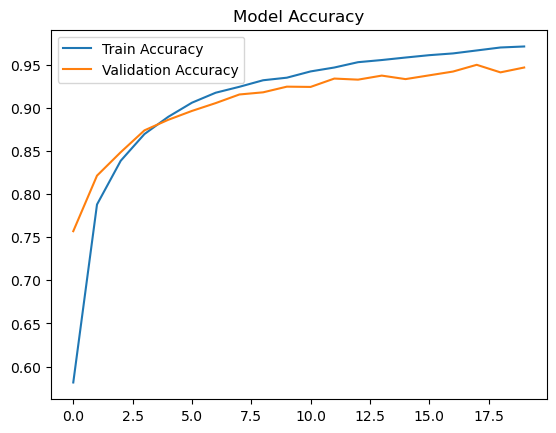

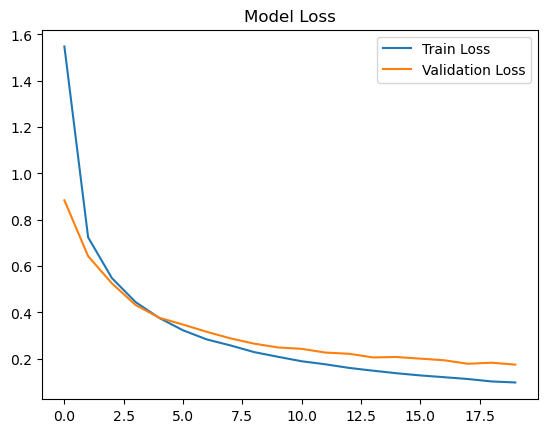

In [65]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()
